In [74]:
import pandas as pd
data = pd.read_csv("data.csv")
data.head() #testing


,text,category
0,Check out 5 BTC sign up bonus start betting by...,cricket
1,ICCRankings Dethroned Virat Kohli after his ma...,cricket
2,Dow we really need this jamboree right now whe...,cricket
3,South Africa v Pakistan Fakhar Zaman ton seals...,cricket
4,Pakistan become first Asian team to win two bi...,cricket


In [75]:
data.shape #tells us we have 4534 data all together and 2 headers (text and category)

(4534, 2)

In [6]:
data['category'].value_counts() #this shows the amount of text for each category

rugby          500
cricket        500
football       500
volleyball     500
basketball     500
tennis         500
hockey         500
baseball       500
badminton      297
tabletennis    237
Name: category, dtype: int64

In [76]:
import string
from nltk.corpus import stopwords

def data_preprocessing(text):
    #this line removes unnecesary punctuation for example "!","," and splits the text in characters
    remove_punct = [char for char in text if char not in string.punctuation]
    
    remove_punct=''.join(remove_punct) #joining characters back into words
    
    #this will tokenize the text and remove stop words 
    return [word for word in remove_punct.split() if word.lower() not in stopwords.words('english')]

In [77]:
data['NUM_CATEGORY']=data.category.map({'cricket':0,'football':1,'basketball':2,'hockey':3,'tennis':4, 'volleyball':5, 'tabletennis':6, 'baseball':7, 'rugby':8, 'badminton':9})
data.head()
#this gives us a new column representing category as a number 

,text,category,NUM_CATEGORY
0,Check out 5 BTC sign up bonus start betting by...,cricket,0
1,ICCRankings Dethroned Virat Kohli after his ma...,cricket,0
2,Dow we really need this jamboree right now whe...,cricket,0
3,South Africa v Pakistan Fakhar Zaman ton seals...,cricket,0
4,Pakistan become first Asian team to win two bi...,cricket,0


In [78]:
#This will split the dataset, so we will have 75% training set and 25%  test set randomised
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.text, data.NUM_CATEGORY, random_state=50)

In [79]:
#coverting the dataset into bag of words
from sklearn.feature_extraction.text import CountVectorizer

#making it use the pre-processing function defined earlier
vect = CountVectorizer(analyzer=data_preprocessing) 
X_train = vect.fit_transform(x_train)
X_test = vect.transform(x_test)


In [80]:
#training and testing the naive bayes classifier
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB(alpha =0.2)

classifier.fit(X_train,y_train) #training the classifier

result = classifier.predict(X_test) #giving testing data to predict their categories 


Accuracy of the Naive Bayes model:  73.80952380952381 %
               precision    recall  f1-score   support

    Cricket-0       0.89      0.77      0.83       115
   Football-1       0.82      0.80      0.81       135
 Basketball-2       0.60      0.69      0.64       106
     Hockey-3       0.85      0.79      0.82       138
     Tennis-4       0.67      0.70      0.68       122
 Volleyball-5       0.69      0.71      0.70       130
Tabletennis-6       0.72      0.65      0.69        52
   Baseball-7       0.74      0.77      0.76       129
      Rugby-8       0.76      0.74      0.75       136
  Badminton-9       0.60      0.68      0.64        71

     accuracy                           0.74      1134
    macro avg       0.73      0.73      0.73      1134
 weighted avg       0.74      0.74      0.74      1134



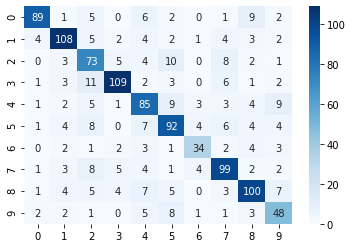

In [81]:
#THIS IS FOR NAIVE BAYES
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import accuracy_score
#percentage of how accurate the predicted results are
accuracy =  accuracy_score(result,y_test)
print("Accuracy of the Naive Bayes model: ", accuracy*100,"%")
cm = confusion_matrix(y_test, result)

sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

target_names = ['Cricket-0', 'Football-1', 'Basketball-2', 'Hockey-3', 'Tennis-4', 'Volleyball-5', 'Tabletennis-6', 'Baseball-7', 'Rugby-8', 'Badminton-9']
print(classification_report(y_test, result, target_names=target_names))


In [83]:
#training and testing logistic regression classifier
from sklearn.linear_model import LogisticRegression
classifier2 = LogisticRegression()

classifier2.fit(X_train,y_train) #training the classifier

result2 = classifier2.predict(X_test) #giving testing data to predict their categories 


Accuracy of the Logistic Regression model:  73.28042328042328 %
               precision    recall  f1-score   support

    Cricket-0       0.89      0.79      0.84       115
   Football-1       0.60      0.86      0.71       135
 Basketball-2       0.61      0.57      0.59       106
     Hockey-3       0.76      0.76      0.76       138
     Tennis-4       0.80      0.72      0.76       122
 Volleyball-5       0.64      0.75      0.69       130
Tabletennis-6       0.83      0.58      0.68        52
   Baseball-7       0.84      0.74      0.79       129
      Rugby-8       0.77      0.72      0.75       136
  Badminton-9       0.79      0.70      0.75        71

     accuracy                           0.73      1134
    macro avg       0.75      0.72      0.73      1134
 weighted avg       0.75      0.73      0.73      1134



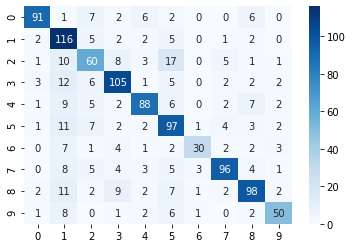

In [84]:
#THIS IS FOR LOGISTIC REGRESSION
accuracy2 =  accuracy_score(result2,y_test)
print("Accuracy of the Logistic Regression model: ",accuracy2*100,"%")
cm2 = confusion_matrix(y_test, result2)

sns.heatmap(cm2, annot=True,cmap='Blues', fmt='g')

target_names = ['Cricket-0', 'Football-1', 'Basketball-2', 'Hockey-3', 'Tennis-4', 'Volleyball-5', 'Tabletennis-6', 'Baseball-7', 'Rugby-8', 'Badminton-9']
print(classification_report(y_test, result2, target_names=target_names))

In [85]:
def predict_category_num_nb(text):
    test = vect.transform(text)
    predicted = classifier.predict(test)
    return predicted
def predict_category_num_lr(text):
    test2 = vect.transform(text)
    predicted2 = classifier2.predict(test2)
    return predicted2

def get_category(predicted3):
    if predicted3  == 0:
         return 'Cricket'
    elif predicted3 == 1:
        return 'Football'
    elif predicted3 == 2:
        return 'Basketball'
    elif predicted3 == 3:
        return 'Hockey'
    elif predicted3 == 4:
        return 'Tennis'
    elif predicted3 == 5:
        return 'Volleyball'
    elif predicted3 == 6:
        return 'Table Tennis'
    elif predicted3 == 7:
        return 'Baseball'
    elif predicted3 == 8:
        return 'Rugby'
    elif predicted3 == 9:
        return 'Badminton'
    else:
        return 'no class found'


In [87]:
#RUN THIS TO TYPE TEXT AND GET PREDICTIONS FROM THE CLASSIFIERS
print("Type your text: ")
print()
userText = input()

predicted_nb = predict_category_num_nb([userText])
predicted_lr = predict_category_num_lr([userText])

category_nb = get_category(predicted_nb)
category_lr = get_category(predicted_lr)

print()
print("Using Naive Bayes, the text belongs to the following category: " + category_nb)
print("Using Logistic Regression, the text belongs to the following category: " + category_lr)



Type your text: 

Association football, more commonly known as simply football or soccer, is a team sport played by all genders with a spherical ball between two teams of 11 players.

Using Naive Bayes, the text belongs to the following category: Rugby
Using Logistic Regression, the text belongs to the following category: Football
